In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import itertools
import xml.etree.ElementTree as ET

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
#isosinglet nn
files = {
#     "Single Pivot n4 m4 d10": "isosinglet_nn_4-10",
    "Traditional Rolling Pivot": "isosinglet_nn_4-10r",
}

In [3]:
corrs = []
for pivot in files.keys():
    if os.path.isdir(files[pivot]):
        hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))
    else:
        hdf5_data = h5py.File(files[pivot])
    #get all correlator data
    for MCObservable in hdf5_data['rotated_correlators']['Values'].keys():
        MCObservableTree = ET.fromstring(MCObservable.replace("|","/"))
        corr_string = MCObservableTree.find('CorrT').text
        sink_str = corr_string.split('{')[1][:-4]
        source_str = corr_string.split('}')[1][4:]
        if sink_str not in corrs:
            corrs.append(sink_str)
        if source_str not in corrs:
            corrs.append(source_str)
    hdf5_data.close()

<ipython-input-3-63063ab1ef85>:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))


In [4]:
corrs

['isosinglet S=0 P=(0,0,0) A2g ROT 0',
 'isosinglet S=0 P=(0,0,0) A2g ROT 1',
 'isosinglet S=0 P=(0,0,0) Eg ROT 0',
 'isosinglet S=0 P=(0,0,0) Eg ROT 1',
 'isosinglet S=0 P=(0,0,0) T1g ROT 0',
 'isosinglet S=0 P=(0,0,0) T1g ROT 1',
 'isosinglet S=0 P=(0,0,0) T1g ROT 2',
 'isosinglet S=0 P=(0,0,0) T1g ROT 3',
 'isosinglet S=0 P=(0,0,0) T1g ROT 4',
 'isosinglet S=0 P=(0,0,0) T1g ROT 5',
 'isosinglet S=0 P=(0,0,0) T1g ROT 6',
 'isosinglet S=0 P=(0,0,0) T1g ROT 7',
 'isosinglet S=0 P=(0,0,0) T1u ROT 0',
 'isosinglet S=0 P=(0,0,0) T1u ROT 1',
 'isosinglet S=0 P=(0,0,0) T1u ROT 2',
 'isosinglet S=0 P=(0,0,0) T2g ROT 0',
 'isosinglet S=0 P=(0,0,0) T2g ROT 1',
 'isosinglet S=0 P=(0,0,0) T2g ROT 2',
 'isosinglet S=0 P=(0,0,0) T2g ROT 3',
 'isosinglet S=0 PSQ=1 A1 ROT 0',
 'isosinglet S=0 PSQ=1 A1 ROT 1',
 'isosinglet S=0 PSQ=1 A1 ROT 2',
 'isosinglet S=0 PSQ=1 A1 ROT 3',
 'isosinglet S=0 PSQ=1 A1 ROT 4',
 'isosinglet S=0 PSQ=1 A1 ROT 5',
 'isosinglet S=0 PSQ=1 A2 ROT 0',
 'isosinglet S=0 PSQ=1 

<ipython-input-5-ede70930a4a6>:10: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))
..\utils.py:22: RuntimeWarning: invalid value encountered in log
  return t[:-1]+0.5*(t[1]-t[0]), np.log( C[:-1]/C[1:] )


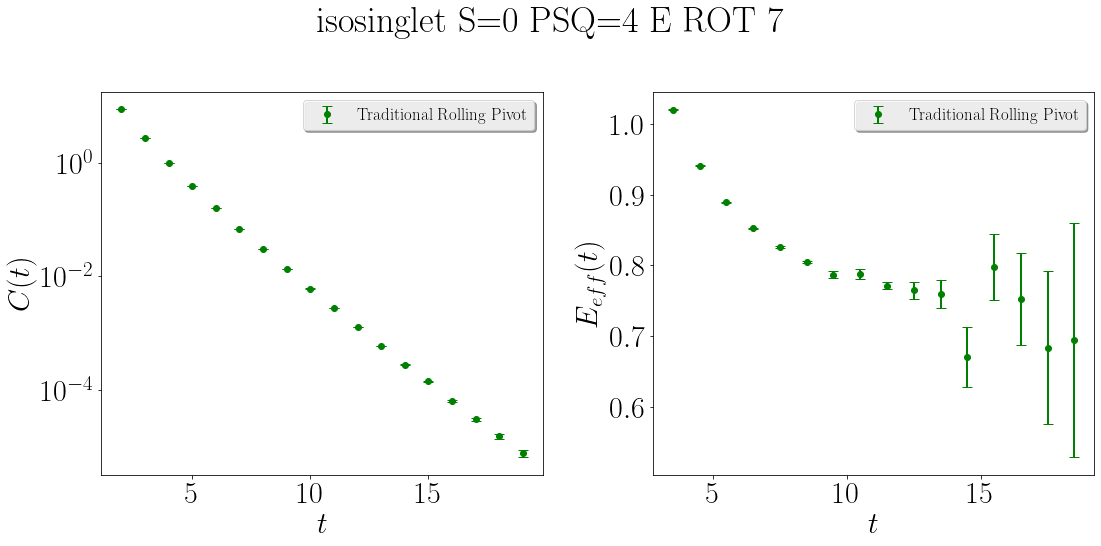

In [5]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(8)
for corr in corrs:
    ax1.clear()
    ax2.clear()
    f.suptitle(corr.replace("_"," "))
    for i,pivot in enumerate(files.keys()):
        if os.path.isdir(files[pivot]):
            hdf5_data = h5py.File(os.path.join(files[pivot],"rotated_correlators.hdf5"))
        else:
            hdf5_data = h5py.File(files[pivot])
#         plt.subplot(1,2,1)
        this_t, this_corr, this_err = utils.collectCorrEstimates(hdf5_data,corr)
        ax1.errorbar( this_t, this_corr,this_err, label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
        ax1.legend()
        ax1.set_xlabel("$t$")
        ax1.set_ylabel("$C(t)$")
        ax1.set_yscale("log")
#         plt.subplot(1,2,2)
        this_t, this_corr, this_err = utils.collectEnergyEstimates(hdf5_data,corr)
        ax2.errorbar( this_t, this_corr,this_err, label=pivot,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
        
#         this_t, this_corr, this_err = utils.collectEnergyEstimates(hdf5_data,corr,func=2)
#         ax2.errorbar( this_t, this_corr,this_err, label=pivot+"2",  color=settings.colors[i+3], marker=settings.markers[i+3], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
        
        
#         this_t, this_corr, this_err = utils.collectEnergyEstimates(hdf5_data,corr,func=3)
#         itmax = np.where( np.array(this_err)>this_corr[0] )[0][0]
# #         print(itmax)
#         ax2.errorbar( this_t[:itmax], this_corr[:itmax],this_err[:itmax], label=pivot+"2",  color=settings.colors[i+3], marker=settings.markers[i+3], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
        
        ax2.legend()
        ax2.set_xlabel("$t$")
        ax2.set_ylabel("$E_{eff}(t)$")
        hdf5_data.close()
    plt.tight_layout()
    plt.savefig(corr+".png")

In [6]:
hdf5_data.close()